In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
titanic_dataset = pd.read_csv('titanic.csv')

In [4]:
titanic_dataset.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_dataset.shape

(891, 16)

In [6]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  who           891 non-null    object 
 11  adult_male    891 non-null    bool   
 12  deck          203 non-null    object 
 13  embark_town   889 non-null    object 
 14  alive         891 non-null    object 
 15  alone         891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [7]:
titanic_dataset.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
dtype: int64

In [8]:
titanic_dataset = titanic_dataset.drop(columns = 'deck',axis=1)

In [9]:
titanic_dataset=titanic_dataset.drop('embark_town',axis=1)

In [10]:
titanic_dataset['age'].fillna(titanic_dataset['age'].mean(),inplace = True)

In [11]:
titanic_dataset['embarked'].fillna(titanic_dataset['embarked'].mode()[0],inplace=True)

In [12]:
titanic_dataset.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [13]:
titanic_dataset.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_dataset['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [15]:
sns.set()

<AxesSubplot:xlabel='survived', ylabel='count'>

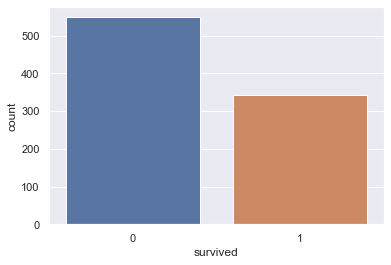

In [16]:
sns.countplot('survived',data = titanic_dataset)

In [17]:
titanic_dataset['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

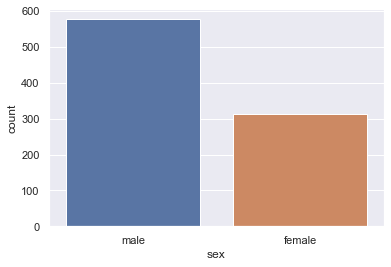

In [18]:
sns.countplot('sex',data = titanic_dataset)

<AxesSubplot:xlabel='sex', ylabel='count'>

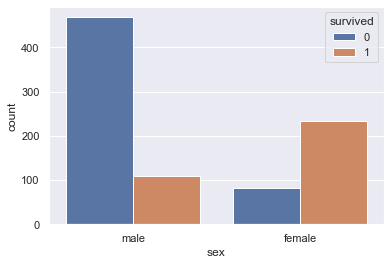

In [19]:
sns.countplot('sex',hue = 'survived',data = titanic_dataset)

In [20]:
titanic_dataset['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='count'>

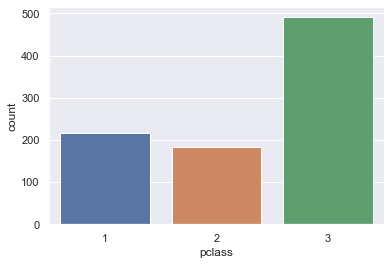

In [21]:
sns.countplot('pclass',data = titanic_dataset)

<AxesSubplot:xlabel='pclass', ylabel='count'>

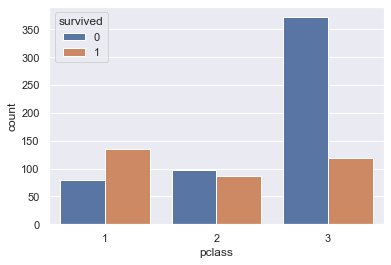

In [22]:
sns.countplot('pclass',hue = 'survived',data = titanic_dataset)

In [23]:
titanic_dataset['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

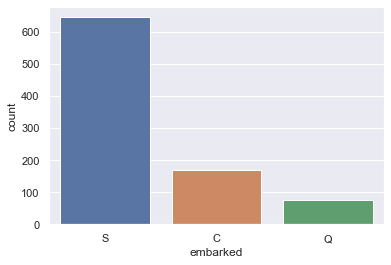

In [24]:
sns.countplot('embarked',data = titanic_dataset)

<AxesSubplot:xlabel='embarked', ylabel='count'>

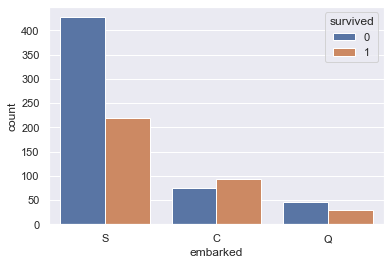

In [25]:
sns.countplot('embarked',hue = 'survived',data = titanic_dataset)

In [26]:
titanic_dataset.replace({'sex': {'male':0,'female':1},'embarked':{'S': 0 ,'C': 1,'Q': 2},'class':{'First':1,'Second':2,'Third':3}, 'who':{'man': 0,'woman':1,'child':2},'adult_male':{'True':1,'False':0},'alone':{'False':0,'True':1}},inplace=True)

In [27]:
titanic_dataset.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,0,22.0,1,0,7.2500,0,3,0,True,no,False
1,1,1,1,1,38.0,1,0,71.2833,1,1,1,False,yes,False
2,2,1,3,1,26.0,0,0,7.9250,0,3,1,False,yes,True
3,3,1,1,1,35.0,1,0,53.1000,0,1,1,False,yes,False
4,4,0,3,0,35.0,0,0,8.0500,0,3,0,True,no,True


In [28]:
X = titanic_dataset.drop(columns = ['passenger_id','alive','survived'],axis=1)
y = titanic_dataset['survived']

In [29]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,0,22.000000,1,0,7.2500,0,3,0,True,False
1,1,1,38.000000,1,0,71.2833,1,1,1,False,False
2,3,1,26.000000,0,0,7.9250,0,3,1,False,True
3,1,1,35.000000,1,0,53.1000,0,1,1,False,False
4,3,0,35.000000,0,0,8.0500,0,3,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,2,0,True,True
887,1,1,19.000000,0,0,30.0000,0,1,1,False,True
888,3,1,29.699118,1,2,23.4500,0,3,1,False,False
889,1,0,26.000000,0,0,30.0000,1,1,0,True,True


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (623, 11)
Shape of y_train =  (623,)
Shape of X_test =  (268, 11)
Shape of y_test =  (268,)


In [44]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
124,1,0,54.000000,0,1,77.2875,0,1,0,True,False
141,3,1,22.000000,0,0,7.7500,0,3,1,False,True
21,2,0,34.000000,0,0,13.0000,0,2,0,True,True
650,3,0,29.699118,0,0,7.8958,0,3,0,True,True
331,1,0,45.500000,0,0,28.5000,0,1,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
400,3,0,39.000000,0,0,7.9250,0,3,0,True,True
118,1,0,24.000000,0,1,247.5208,1,1,0,True,False
701,1,0,35.000000,0,0,26.2875,0,1,0,True,True
206,3,0,32.000000,1,0,15.8500,0,3,0,True,False


In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
X_train_pred = model.predict(X_train)

In [48]:
X_train_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [49]:
trained_data_accuracy = accuracy_score(y_train,X_train_pred)

In [50]:
print('Accuracy of trained data = ', trained_data_accuracy )

Accuracy of trained data =  0.8154093097913323


In [51]:
X_test_pred = model.predict(X_test)

In [52]:
X_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [53]:
tested_data_acuuracy = accuracy_score(y_test,X_test_pred)

In [54]:
print('Accuracy of tested data = ', tested_data_acuuracy )

Accuracy of tested data =  0.835820895522388


In [1]:
from sklearn.metrics import confusion_matrix

In [55]:
cf_matrix = confusion_matrix(y_test,X_test_pred)
cf_matrix

array([[154,  13],
       [ 31,  70]], dtype=int64)

In [56]:
tn,fp,fn,tp = cf_matrix.ravel()
print(tn,fp,fn,tp)

154 13 31 70


<AxesSubplot:>

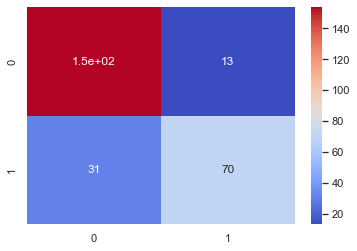

In [57]:
sns.heatmap(cf_matrix,cmap='coolwarm',annot = True)